- Mauricio Pacheco Lizama

# Instagram Scraper Using Instaloader




In [ ]:
! pip install instaloader

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.7/64.7 kB 2.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for instaloader: filename=instaloader-4.12.1-py3-none-any.whl size=66888 sha256=12d58f7a6dbfc1385dd19ec2d4748c1f0bf6e5390c0b48e35d4ae5e2fbc5c224
  Stored in directory: /root/.cache/pip/wheels/7f/16/e2/26083ad9b71ab3b4de23be5aeeccffd695f6575cd7786bfde3
Successfully built instaloader


## Libraries Imported

In [ ]:
import os
import instaloader
import time
import os
import networkx as nx
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

# Configuration of Directories and Credentials
The core functionality of the script is encapsulated in the get_friends function. This function takes two parameters: loader, an instance of instaloader.Instaloader, and username, the Instagram username whose friends are to be fetched. Inside the function, the script tries to fetch the profile of the specified user, along with their followers and followees. It then determines the mutual friends by finding the intersection of the followers and followees sets. The usernames of these mutual friends are saved to a text file named after the profile's username.

To handle potential connection issues and ensure compliance with Instagram's request limits, the function includes error handling for connection exceptions and non-existent profiles, and it incorporates a delay using time.sleep to prevent making too many requests in a short period.

The script then initializes an instance of instaloader.Instaloader and attempts to log in to Instagram using the provided credentials. It handles various exceptions that might occur during the login process, such as invalid credentials or connection errors.

Once logged in, the script fetches the profile of the logged-in user and retrieves their followers and followees. It determines the mutual friends and prints their usernames. For each mutual friend, it calls the get_friends function to fetch and save their friends' data, ensuring that the data for each user is only fetched if it hasn't already been saved.

In [ ]:
data_dir = "data"  # Directory to store data
my_username = 'mauuser'
my_password = 'maupassword'

# Create data directory if it doesn't exist
if not os.path.exists(data_dir):
    os.makedirs(data_dir)

def get_friends(loader, username):
    print(f"Fetching friends for user: {username}")
    try:
        profile = instaloader.Profile.from_username(loader.context, username)
        followers = set(profile.get_followers())
        followees = set(profile.get_followees())

        # Intersect followers and followees to find friends
        friends = followers.intersection(followees)
        friends_username = []

        for friend in friends:
            if not friend.is_private:  # Check if the profile is public
                friends_username.append(friend.username)

        print(f"Public friends of {username}: {friends_username}")

        # Save friends data to file
        with open(os.path.join(data_dir, profile.username + '.txt'), 'w') as f:
            f.write('\n'.join(friends_username))

        # Add delay to prevent too many requests
        time.sleep(10)

    except instaloader.exceptions.ConnectionException as e:
        print(f"Connection error while fetching friends for {username}: {e}")
        time.sleep(10)  # Wait before retrying
    except instaloader.exceptions.ProfileNotExistsException:
        print(f"Profile {username} does not exist.")
    except Exception as e:
        print(f"An error occurred: {e}")

# Initialize Instaloader and login
loader = instaloader.Instaloader()
print("Logging in...")
try:
    loader.login(my_username, my_password)
    print("Login successful")
except instaloader.exceptions.BadCredentialsException:
    print("Invalid credentials provided.")
    exit(1)
except instaloader.exceptions.ConnectionException as e:
    print(f"Connection error during login: {e}")
    exit(1)
except Exception as e:
    print(f"An unexpected error occurred during login: {e}")
    exit(1)

# Find my friends
try:
    my_profile = instaloader.Profile.from_username(loader.context, my_username)
    my_followers = set(my_profile.get_followers())
    my_followees = set(my_profile.get_followees())

    my_friends = my_followers.intersection(my_followees)
    my_friends_username = []

    for friend in my_friends:
        if not friend.is_private:  # Check if the profile is public
            my_friends_username.append(friend.username)

    print(f"My public friends: {my_friends_username}")

    # Save friends data for each friend
    for username in my_friends_username:
        print(f"Processing user: {username}")
        if not os.path.isfile(os.path.join(data_dir, username + '.txt')):
            get_friends(loader, username)

    print("Data fetching completed.")
except instaloader.exceptions.ConnectionException as e:
    print(f"Connection error while fetching friends: {e}")
except instaloader.exceptions.ProfileNotExistsException:
    print(f"Profile {my_username} does not exist.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")



Logging in...
An unexpected error occurred during login: Login error: Unexpected response, this might indicate a blocked IP.
An unexpected error occurred: Login required to get a profile's followers.


convert the data in edgelist file


In [ ]:
data_dir = 'data'

G = nx.Graph()

for filename in os.listdir(data_dir):
    if filename.endswith(".txt"):
        file_path = os.path.join(data_dir, filename)
        with open(file_path, 'r') as file:
            users = file.read().strip().split('\n')
            for i in range(len(users)):
                for j in range(i + 1, len(users)):
                    G.add_edge(users[i], users[j])


edgelist_path = 'graph.edgelist'
nx.write_edgelist(G, edgelist_path, data=False)

print(f"Grafo exportado a {edgelist_path}")


Grafo exportado a graph.edgelist


In [ ]:
edgelist_path = 'graph.edgelist'
G = nx.read_edgelist(edgelist_path)

plt.figure(figsize=(12, 12))
pos = nx.spring_layout(G)



<Figure size 1200x1200 with 0 Axes>

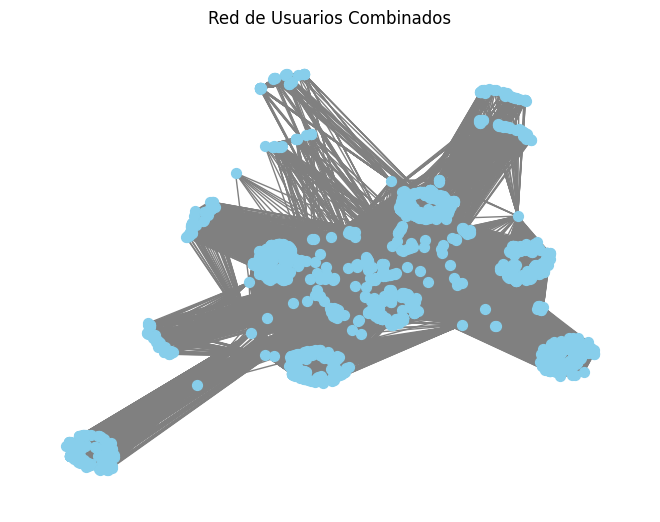

In [ ]:
nx.draw(G, pos, with_labels=False, node_size=50, node_color="skyblue", edge_color="gray")
plt.title("Red de Usuarios Combinados")
plt.show()

In [ ]:

degree_centrality = nx.degree_centrality(G)
betweenness_centrality = nx.betweenness_centrality(G)
closeness_centrality = nx.closeness_centrality(G)
eigenvector_centrality = nx.eigenvector_centrality(G)

In [ ]:
# Análisis de componentes conectados
connected_components = [len(c) for c in sorted(nx.connected_components(G), key=len, reverse=True)]


In [ ]:
# Mostrar algunas estadísticas
print("Número de nodos:", G.number_of_nodes())
print("Número de aristas:", G.number_of_edges())
print("Grado de centralidad (top 5):", sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)[:5])
print("Centralidad de intermediación (top 5):", sorted(betweenness_centrality.items(), key=lambda x: x[1], reverse=True)[:5])
print("Centralidad de cercanía (top 5):", sorted(closeness_centrality.items(), key=lambda x: x[1], reverse=True)[:5])
print("Centralidad de vector propio (top 5):", sorted(eigenvector_centrality.items(), key=lambda x: x[1], reverse=True)[:5])
print("Número de componentes conectados:", len(connected_components))
print("Tamaño de los componentes conectados:", connected_components)

Número de nodos: 2079
Número de aristas: 318820
Grado de centralidad (top 5): [('maudevtv', 1.0), ('lil.saaku', 0.7175168431183832), ('e_asens_c', 0.6636188642925891), ('superns.vrc', 0.6568816169393648), ('abzalot.vr', 0.6212704523580366)]
Centralidad de intermediación (top 5): [('maudevtv', 0.21822200865199065), ('lil.saaku', 0.06379004847690231), ('losdiablos.vr', 0.03499520999929611), ('e_asens_c', 0.034909744219746436), ('kezuto.vrc', 0.03487409009439878)]
Centralidad de cercanía (top 5): [('maudevtv', 1.0), ('lil.saaku', 0.7797373358348968), ('e_asens_c', 0.7482895210658984), ('superns.vrc', 0.7445360085990684), ('abzalot.vr', 0.7253054101221641)]
Centralidad de vector propio (top 5): [('maudevtv', 0.06240766634419931), ('e_asens_c', 0.059526136703309376), ('lyrathetryhard', 0.058726032215794255), ('superns.vrc', 0.05842517120861797), ('abzalot.vr', 0.05830040245224326)]
Número de componentes conectados: 1
Tamaño de los componentes conectados: [2079]


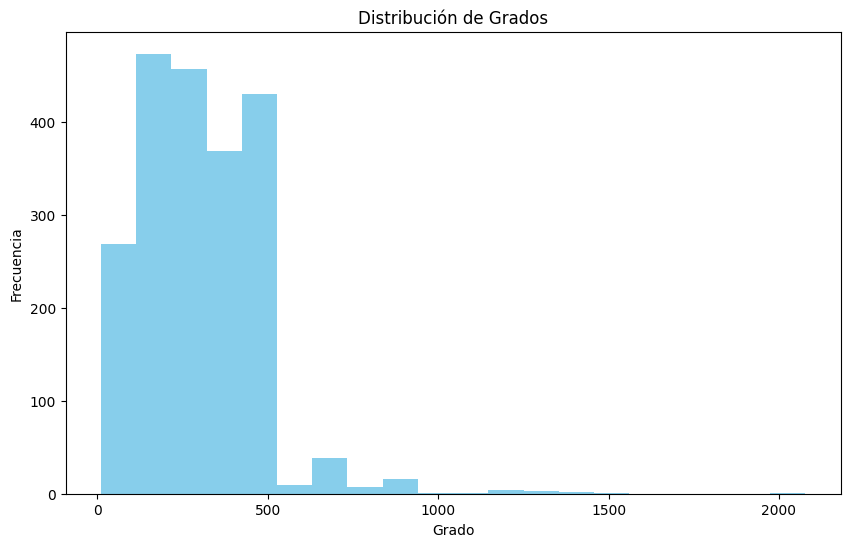

In [ ]:
# 1. Distribución de Grados
degrees = [G.degree(n) for n in G.nodes()]
plt.figure(figsize=(10, 6))
plt.hist(degrees, bins=20, color='skyblue')
plt.title("Distribución de Grados")
plt.xlabel("Grado")
plt.ylabel("Frecuencia")
plt.show()

In [ ]:
# 2. Coeficiente de Agrupamiento
clustering_coeffs = nx.clustering(G)
average_clustering = np.mean(list(clustering_coeffs.values()))
print("Coeficiente de Agrupamiento Promedio:", average_clustering)

Coeficiente de Agrupamiento Promedio: 0.9707870485192812


In [ ]:
# 3. Caminos Más Cortos
shortest_paths = dict(nx.all_pairs_shortest_path_length(G))
average_shortest_path_length = np.mean([length for paths in shortest_paths.values() for length in paths.values()])
print("Longitud Promedio del Camino Más Corto:", average_shortest_path_length)


Longitud Promedio del Camino Más Corto: 1.8515126759475005


In [ ]:
# 4. Diámetro de la Red
diameter = nx.diameter(G)
print("Diámetro de la Red:", diameter)


Diámetro de la Red: 2


In [ ]:
# 5. Centralización
def network_centralization(G, centrality_metric):
    centrality = centrality_metric(G)
    max_centrality = max(centrality.values())
    n = len(G)
    centralization = sum(max_centrality - c for c in centrality.values()) / (n - 1)
    return centralization

In [ ]:
# 6. Robustez y Vulnerabilidad
# Eliminar nodos con mayor centralidad de grado y observar el cambio en el tamaño del componente más grande
sorted_by_degree = sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)
G_robustness = G.copy()
removed_nodes = []
largest_components = []
for node, _ in sorted_by_degree[:10]:  # Eliminar los 10 nodos con mayor centralidad de grado
    G_robustness.remove_node(node)
    removed_nodes.append(node)
    largest_components.append(len(max(nx.connected_components(G_robustness), key=len)))



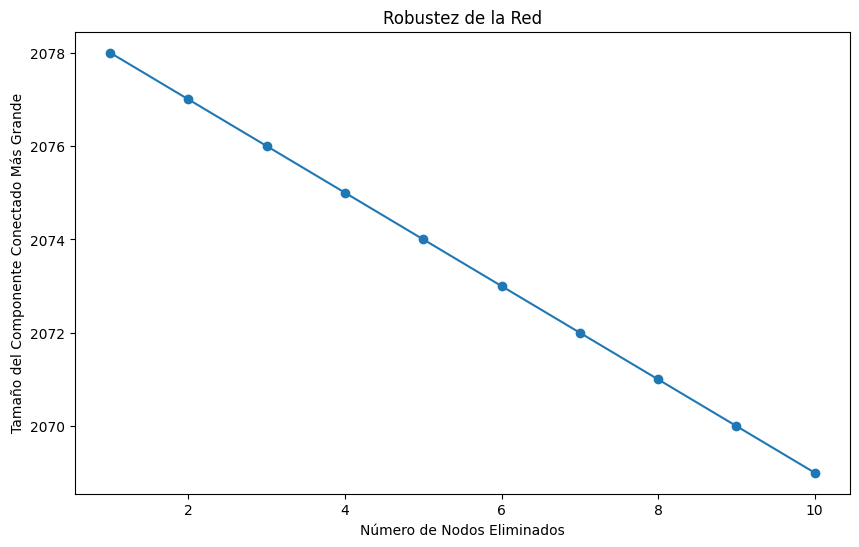

Nodos eliminados: ['maudevtv', 'lil.saaku', 'e_asens_c', 'superns.vrc', 'abzalot.vr', 'kezuto.vrc', 'soiicapo', 'ne4t20_', 'losdiablos.vr', 'spyroestelarvt']


In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), largest_components, marker='o')
plt.title("Robustez de la Red")
plt.xlabel("Número de Nodos Eliminados")
plt.ylabel("Tamaño del Componente Conectado Más Grande")
plt.show()

print("Nodos eliminados:", removed_nodes)

In [ ]:
from networkx.algorithms.community import greedy_modularity_communities
communities = list(greedy_modularity_communities(G))

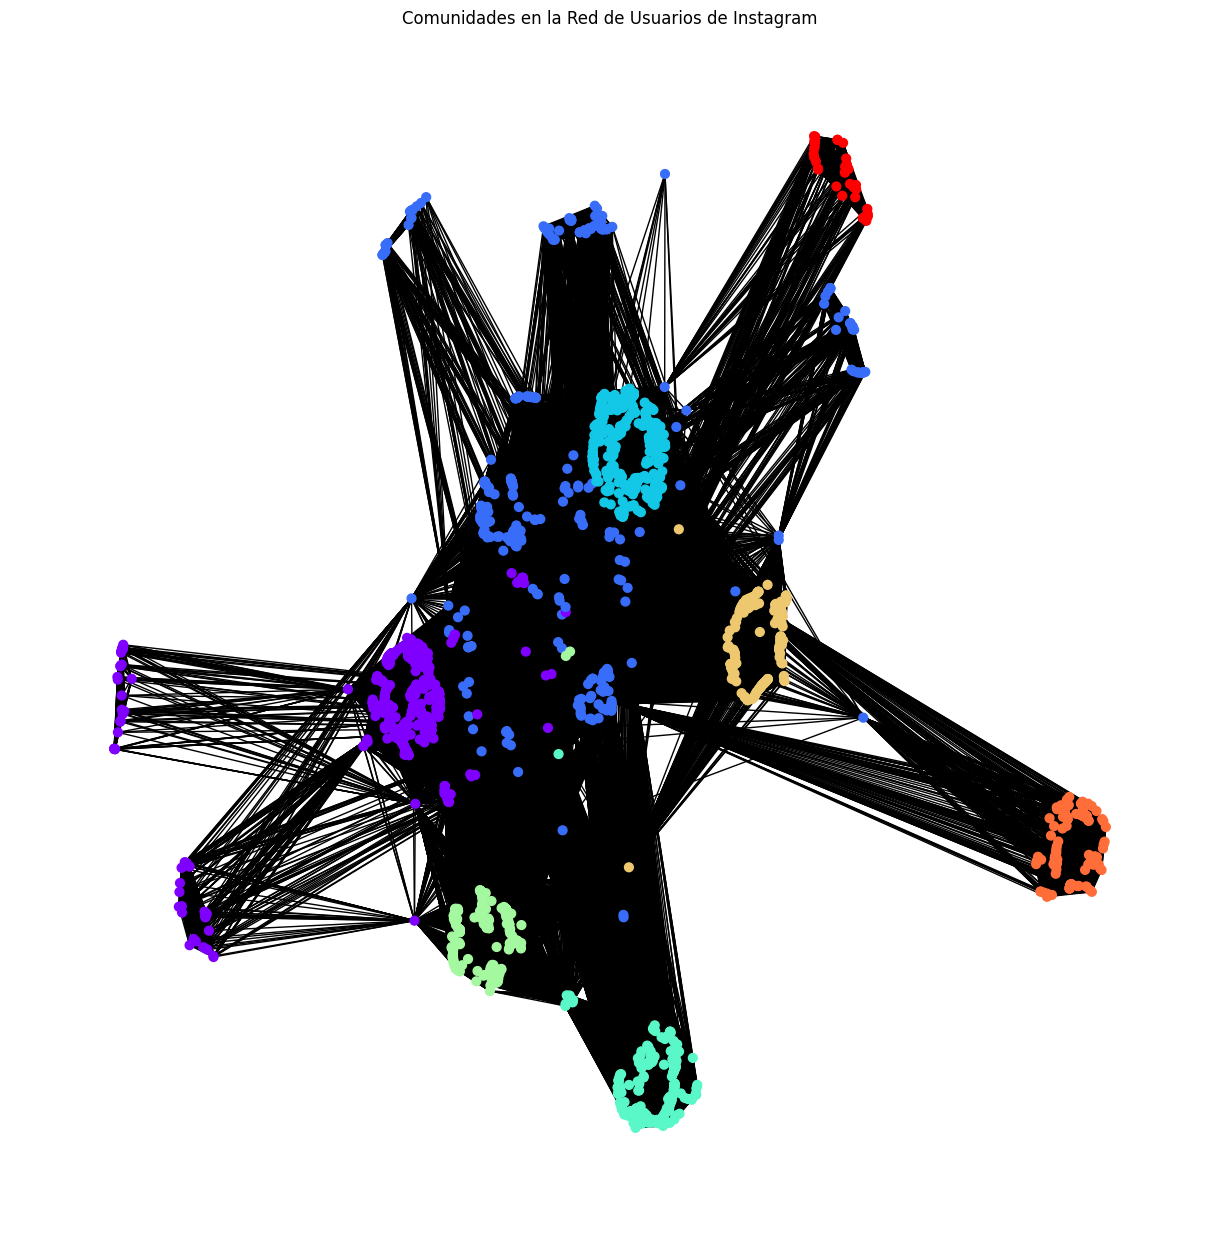

Comunidad 1: ['saidai_vr', 'not_ur_vrc_mom', 'togaeddd', '00pandix00_vr', 'alexsegarraa', 'sabekns', 'viperz_ayoub', 'usu142ario_', 'jose_gabarri.08', 'viicssj_', 'gisela__ga', 'nexvice.vrc', 'danextg1', 'melonbreadvrchat', 'chapassss_07', 'chiinoogame', 'apm_vr', 'aguskitsune', 'miilkybb.exe', 'its.noee_', 'lunakioko', 'catacrakpriv', 'lorenaask', 'al3xia.25', 'roxas.10', 'mimi_xiong.vr', 'romioliveera', 'nydell09', 'bambansita', 'enzo_santana1997', 'yuan_x.vrc', 'alejandragaming_x1', 'ttnlm_', 'alejandro_smirnov', 'ramsessantanaa_', 'soy4ngel.exe', 'mimi.xiong_', 'crystalia.exe', 'untalkala', '_ok0o', 'danirtx.vr', 'romi_alioli', 'zoruh_vr', 'tuvieja.exe', 'lipsukkax', 'dogor816', 'antoniiojuradoo__', 'l_e_s_t_i_', 'azster_vrc_', 'darlingvrc', '_liberty_libb_', 'juanluidas', 'pol_owovrc', 'vebeblak', 'baby.taichu', 'shiron_foxvr', 'vr_chat_loliforever', 'ericmassana', '_mka.akit47_', 'liltwelfvr', 'dunoguel', 'soapyyvr', 'niikita.vr', '0nz14im', 'yeya.vr', 'damru.vr', '_nightcore_mus

In [ ]:
# Crear un diccionario para almacenar a qué comunidad pertenece cada nodo
node_community = {}
for i, community in enumerate(communities):
    for node in community:
        node_community[node] = i

# Visualizar las comunidades
pos = nx.spring_layout(G)
plt.figure(figsize=(12, 12))

colors = [node_community[node] for node in G.nodes()]
nx.draw(G, pos, node_color=colors, with_labels=False, node_size=40, cmap=plt.cm.rainbow)
plt.title("Comunidades en la Red de Usuarios de Instagram")
plt.show()

# Mostrar las comunidades encontradas
for i, community in enumerate(communities):
    print(f"Comunidad {i + 1}: {list(community)}")

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx
from matplotlib.animation import FuncAnimation
from networkx.algorithms.community import greedy_modularity_communities
import time
from tqdm import tqdm

start_time = time.time()

# Leer el archivo .edgelist
edgelist_path = 'graph.edgelist'
G = nx.read_edgelist(edgelist_path)

# Extraer las aristas en el orden en que se añadirán
edges = list(G.edges())
nodes = list(G.nodes())

# Inicializar un grafo vacío
G_dynamic = nx.Graph()

# Configurar la visualización
fig, ax = plt.subplots(figsize=(12, 12))
pos = nx.spring_layout(G, seed=42)  # Fijar las posiciones con una semilla

# Detectar comunidades en el grafo completo para evitar recalculaciones en cada paso
communities = list(greedy_modularity_communities(G))
node_community = {}
for i, community in enumerate(communities):
    for node in community:
        node_community[node] = i

# Asignar colores a los nodos según su comunidad una vez
colors = [node_community.get(node, -1) for node in nodes]

def update(num):
    ax.set_title(f"User Network - Paso {num+1}")

    # Añadir nodos y aristas hasta el paso actual
    batch_size = 10  # Aumentar el tamaño del lote
    end_index = min(len(edges), num * batch_size)
    new_edges = edges[(num - 1) * batch_size:end_index]
    G_dynamic.add_edges_from(new_edges)

    # Dibujar solo los nuevos nodos y aristas
    new_nodes = set(node for edge in new_edges for node in edge)
    nx.draw_networkx_edges(G_dynamic, pos, edgelist=new_edges, ax=ax, edge_color="gray")
    nx.draw_networkx_nodes(G_dynamic, pos, nodelist=new_nodes, node_size=50, node_color=[colors[nodes.index(node)] for node in new_nodes], cmap=plt.cm.rainbow)

# Crear la animación
frames = len(edges) // 10 + 1  # Ajustar el número de frames basado en el batch_size

# Usar tqdm para mostrar la barra de progreso
for i in tqdm(range(frames), desc="Creando animación"):
    update(i)

ani = FuncAnimation(fig, update, frames=frames, repeat=False)

# Guardar la animación en un archivo con un valor ajustable de fps
fps = 30  # Ajusta este valor según tus necesidades
ani.save('network_community_animation.mp4', writer='Pillow', fps=fps)

end_time = time.time()
total_time = end_time - start_time
print(f"Tiempo total de procesamiento: {total_time:.2f} segundos")

# Mostrar la animación
plt.show()